OPENQASM 2.0;
include "qelib1.inc";
qreg q0[5];
creg c0[5];
h q0[3];
cx q0[0],q0[4];
cx q0[3],q0[0];



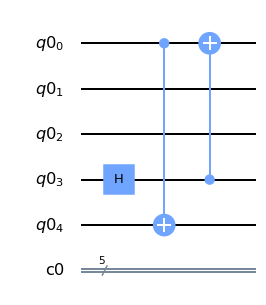

In [1]:
from qiskit.assembler import *
from qiskit.transpiler import *
from qiskit import *

myQReg = QuantumRegister(5)
myCReg = ClassicalRegister(5)

myCircuit = QuantumCircuit(myQReg,myCReg)

myCircuit.h(3)
myCircuit.cx(0, 4)
myCircuit.cx(3, 0)

print (myCircuit.qasm())

myCircuit.draw()

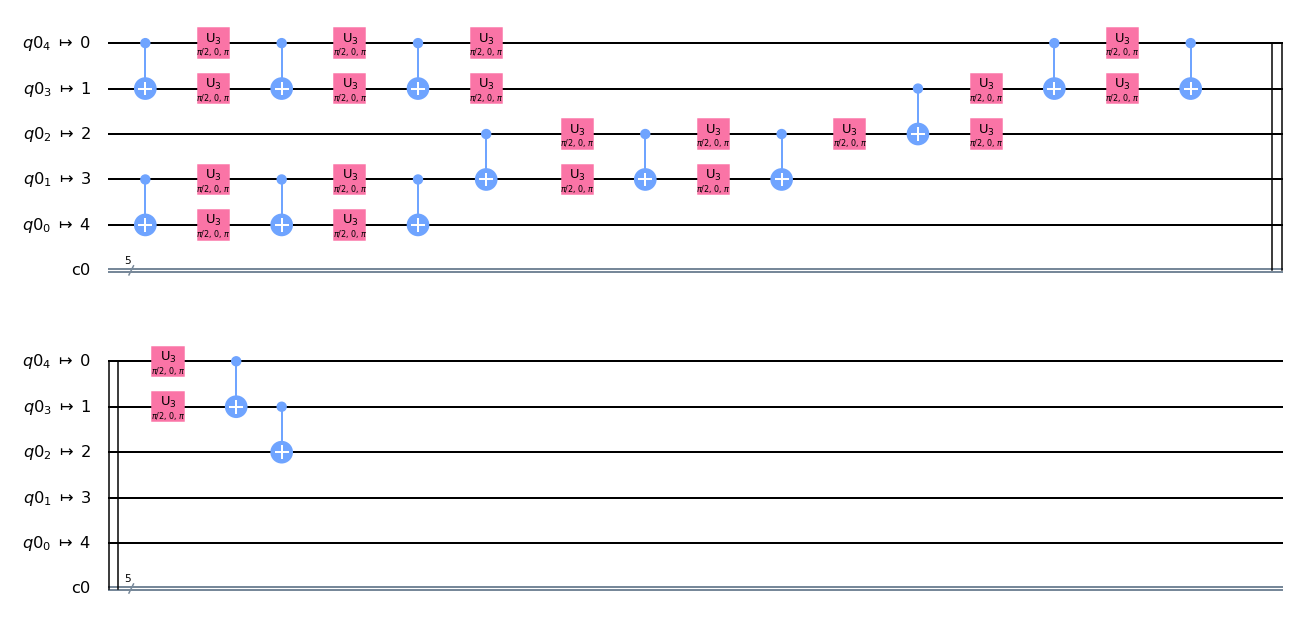

In [3]:
compiled = transpile(myCircuit,basis_gates=(['cx', 'u3']),
                     coupling_map = CouplingMap([[0,1],[1,2],[2,3],[3,4]]))

compiled.draw(output='mpl')

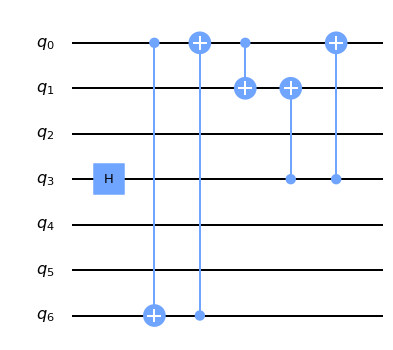

In [4]:
from qiskit.transpiler.passes import *

qr = QuantumRegister(7,'q')
circuit = QuantumCircuit(qr)

circuit.h(qr[3])
circuit.cx(qr[0], qr[6])
circuit.cx(qr[6], qr[0])
circuit.cx(qr[0], qr[1])
circuit.cx(qr[3], qr[1])
circuit.cx(qr[3], qr[0])

circuit.draw(output='mpl')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: The parameter pass_manager in transpile is being deprecated. The preferred way to tranpile a circuit using a custom pass manager is pass_manager.run(circuit)
  


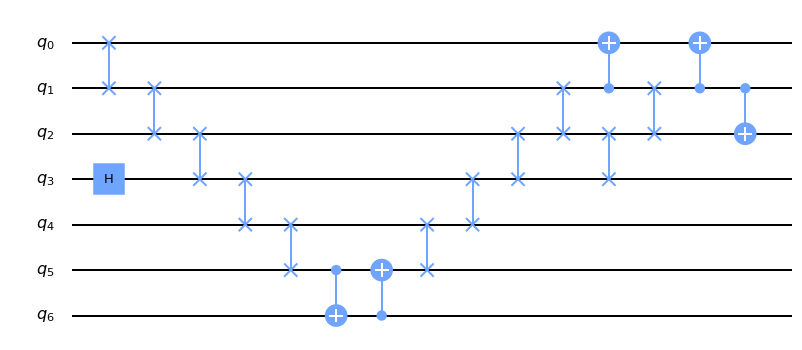

In [6]:
#coupling = [[0,1],[1,2],[2,3],[3,4],[4,5],[5,6]]
simulator = Aer.get_backend('qasm_simulator')
coupling_map =CouplingMap([[0,1],[1,2],[2,3],[3,4],[4,5],[5,6]])
pass_manager = PassManager()
pass_manager.append([BasicSwap(coupling_map=coupling_map)])
basic_circuit = transpile(circuit,pass_manager=pass_manager)

basic_circuit.draw(output='mpl')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: The parameter pass_manager in transpile is being deprecated. The preferred way to tranpile a circuit using a custom pass manager is pass_manager.run(circuit)
  This is separate from the ipykernel package so we can avoid doing imports until


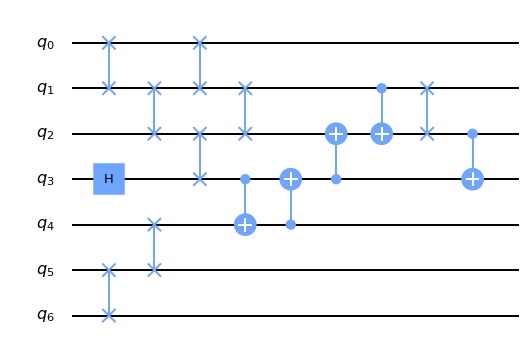

In [7]:
pass_manager = PassManager()
pass_manager.append([LookaheadSwap(coupling_map=coupling_map)])
lookahead_circuit = transpile(circuit,pass_manager=pass_manager)

lookahead_circuit.draw(output='mpl')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: The parameter pass_manager in transpile is being deprecated. The preferred way to tranpile a circuit using a custom pass manager is pass_manager.run(circuit)
  This is separate from the ipykernel package so we can avoid doing imports until


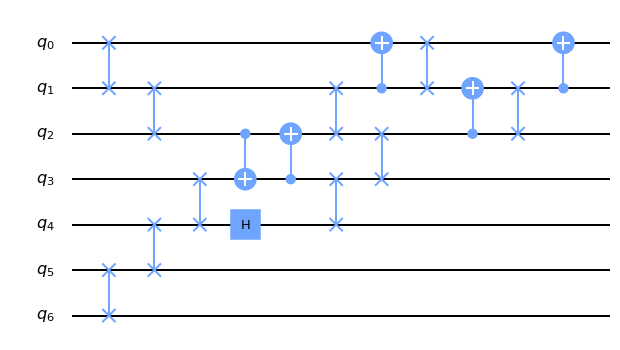

In [9]:
pass_manager = PassManager()
pass_manager.append([StochasticSwap(coupling_map=coupling_map)])
stochastic_circuit = transpile(circuit,pass_manager=pass_manager)

stochastic_circuit.draw(output='mpl')

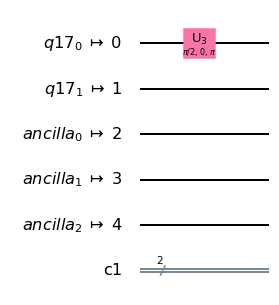

In [10]:
myQReg = QuantumRegister(2)
myCReg = ClassicalRegister(2)

myCircuit = QuantumCircuit(myQReg,myCReg)

myCircuit.h(0)

compiled = transpile(myCircuit,basis_gates=(['cx', 'u3']),
                     coupling_map = CouplingMap([[0,1],[1,2],[2,3],[3,4]]))

compiled.draw(output='mpl')